In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [221]:
movies = pd.read_csv('data/movies_metadata.csv')
links = pd.read_csv('data/links_small.csv')
ratings = pd.read_csv('data/ratings_small.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11568\3487428576.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('data/movies_metadata.csv')


In [222]:
# ---- LINKS ----
links['tmdbId'] = pd.to_numeric(links['tmdbId'], errors='coerce')
links = links.dropna(subset=['tmdbId'])
links['tmdbId'] = links['tmdbId'].astype(int)

# check lại
links['tmdbId'].dtype

dtype('int64')

In [223]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies.dropna(subset=['id'])
movies['id'] = movies['id'].astype(int)

movies = movies[movies['id'].isin(links['tmdbId'])]

In [224]:
movies.shape

(9099, 24)

In [225]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [226]:
movies.isnull().sum()

adult                       0
belongs_to_collection    7425
budget                      0
genres                      0
homepage                 7125
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   12
popularity                  0
poster_path                 3
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      2
tagline                  2066
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [227]:
movies.dropna(subset=['title', 'genres'],inplace=True)

In [228]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [229]:
final_dataset = ratings.pivot(index='movieId', columns='userId', values = 'rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
final_dataset.fillna(0,inplace=True)

In [231]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [233]:
no_user_voted

movieId
1         247
2         107
3          59
4          13
5          56
         ... 
161944      1
162376      1
162542      1
162672      1
163949      1
Name: rating, Length: 9066, dtype: int64

In [234]:
no_movies_voted

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: rating, Length: 671, dtype: int64

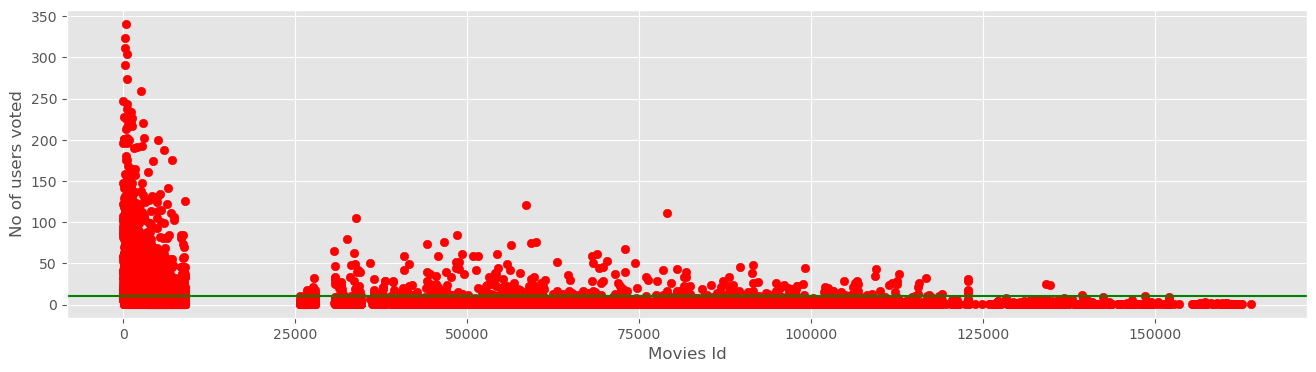

In [235]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(1, 1, figsize=(16, 4))

ax.scatter(no_user_voted.index, no_user_voted, color='red')
ax.axhline(y=10, color='green')

ax.set_xlabel('Movies Id')
ax.set_ylabel('No of users voted')

plt.show()


In [236]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [237]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


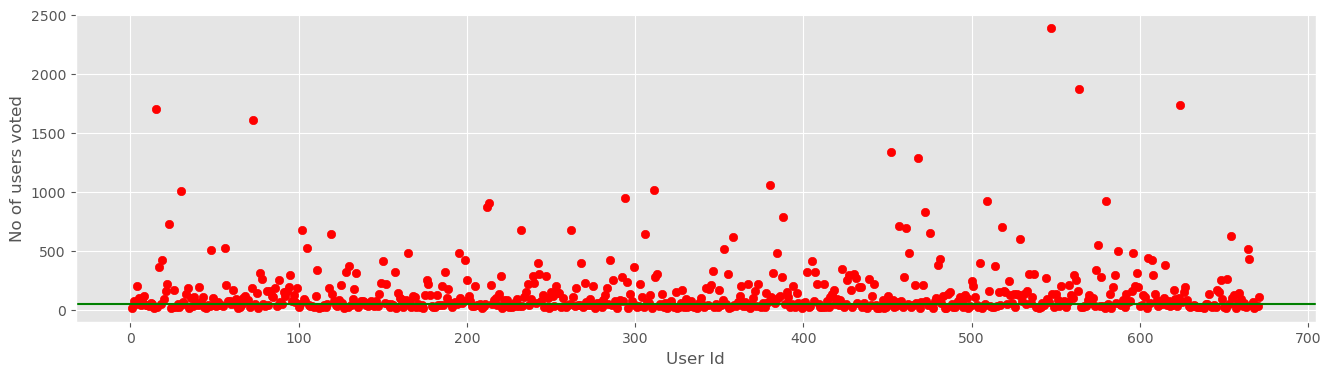

In [238]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(1, 1, figsize=(16, 4))

ax.scatter(no_movies_voted.index, no_movies_voted, color='red')
ax.axhline(y=50, color='green')

ax.set_xlabel('User Id')
ax.set_ylabel('No of users voted')

plt.show()


In [239]:
final_dataset = final_dataset.loc[: ,no_movies_voted[no_movies_voted > 50].index]

In [240]:
final_dataset.head()

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [241]:
final_dataset.shape

(2083, 421)

In [242]:
2083 * 421

876943

In [243]:
sample = np.array([[1,0,0,0,0] , [0,0,2,0,0], [0,0,4,0,0]])
sparsity = 1.0 - np.count_nonzero(sample) / float(sample.size)
print(sparsity)

0.8


In [244]:
from scipy.sparse import csr_matrix
csr_sample = csr_matrix(sample)
print(csr_sample)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 5)>
  Coords	Values
  (0, 0)	1
  (1, 2)	2
  (2, 2)	4


In [245]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace= True)

In [246]:
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 73034 stored elements and shape (2083, 421)>
  Coords	Values
  (0, 4)	3.0
  (0, 7)	5.0
  (0, 8)	2.0
  (0, 11)	3.0
  (0, 12)	3.5
  (0, 15)	3.0
  (0, 16)	5.0
  (0, 17)	4.0
  (0, 26)	4.0
  (0, 27)	4.0
  (0, 30)	4.0
  (0, 37)	5.0
  (0, 38)	3.0
  (0, 39)	4.0
  (0, 40)	5.0
  (0, 41)	5.0
  (0, 42)	3.5
  (0, 43)	5.0
  (0, 44)	3.0
  (0, 45)	4.0
  (0, 47)	2.0
  (0, 50)	3.5
  (0, 52)	3.0
  (0, 54)	5.0
  (0, 55)	5.0
  :	:
  (2081, 91)	5.0
  (2081, 156)	5.0
  (2081, 161)	2.5
  (2081, 169)	4.0
  (2081, 177)	5.0
  (2081, 188)	4.0
  (2081, 227)	4.5
  (2081, 251)	3.5
  (2081, 297)	5.0
  (2081, 322)	3.5
  (2081, 343)	4.0
  (2081, 392)	5.0
  (2081, 398)	4.5
  (2082, 8)	2.5
  (2082, 30)	4.0
  (2082, 42)	3.5
  (2082, 43)	4.0
  (2082, 155)	4.0
  (2082, 169)	3.0
  (2082, 227)	4.0
  (2082, 232)	4.0
  (2082, 284)	3.5
  (2082, 304)	3.5
  (2082, 343)	3.5
  (2082, 392)	4.0


In [247]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm = 'brute', n_neighbors = 20, n_jobs= -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [248]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [249]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [250]:
final_dataset.columns

Index(['movieId',         2,         3,         4,         5,         7,
               8,        12,        13,        15,
       ...
             655,       656,       658,       659,       660,       662,
             664,       665,       667,       671],
      dtype='object', name='userId', length=422)

In [251]:
def get_recomendation(movie_name, n_recommend=10):
    # 1. Tìm phim trong TMDB
    movie_list = movies[movies['title'].str.contains(
        movie_name, case=False, na=False
    )]

    if movie_list.empty:
        print(" Movie not found in TMDB")
        return None

    tmdb_id = movie_list.iloc[0]['id']

    # 2. Map TMDB → MovieLens movieId
    movie_id = links.loc[
        links['tmdbId'] == tmdb_id, 'movieId'
    ].values

    if len(movie_id) == 0:
        print(" No mapping TMDB → MovieLens")
        return None

    movie_id = movie_id[0]

    # 3. Lấy index trong final_dataset
    idx = final_dataset[final_dataset['movieId'] == movie_id].index

    if idx.empty:
        print(" Movie not in final_dataset")
        return None

    idx = idx[0]

    # 4. KNN
    distances, indices = knn.kneighbors(
        csr_data[idx], n_neighbors=n_recommend + 1
    )

    # bỏ chính nó (index 0)
    recs = list(zip(
        indices.squeeze()[1:], 
        distances.squeeze()[1:]
    ))

    # 5. Build kết quả
    recommended_movies = []

    for i, dist in recs:
        rec_movie_id = final_dataset.iloc[i]['movieId']

        tmdb_row = movies.merge(
            links, left_on='id', right_on='tmdbId'
        )

        title = tmdb_row.loc[
            tmdb_row['movieId'] == rec_movie_id, 'title'
        ].values

        if len(title):
            recommended_movies.append({
                'title': title[0],
                'distance': dist
            })

    return pd.DataFrame(recommended_movies)


In [252]:
get_recomendation('Avatar')

,title,distance
0,Inception,0.302219
1,Iron Man,0.329733
2,The Dark Knight,0.366074
3,The Dark Knight Rises,0.387956
4,Star Trek,0.389276
5,Sherlock Holmes,0.404018
6,The Avengers,0.414817
7,Up,0.420018
8,Guardians of the Galaxy,0.421679
9,The Hangover,0.427081
